In [1]:
from scipy.stats import chisquare
from scipy import stats
import urllib.request
import string
import requests
from bs4 import BeautifulSoup
import pandas as pd
import multiprocessing
import gensim
import sys
import spacy
nlp=spacy.load('en')
import seaborn as sns
from nltk.tokenize import WordPunctTokenizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from scipy import spatial
from collections import Counter
import numpy as np
from collections import defaultdict
from pprint import pprint
from gensim import corpora
import re
import logging
import requests
import urllib 
import re
import sys
import zipfile
from glob import glob
import statsmodels.api as sm
import scipy
import scipy.stats as ss
from scipy.signal import savgol_filter
import random
np.set_printoptions(precision=2)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import metrics
from sklearn.cluster import KMeans
# from the demo
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.corpus import names
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [2]:
# Load your usual SpaCy model (one of SpaCy English models)
import spacy
nlp = spacy.load('en')

# load NeuralCoref and add it to the pipe of SpaCy's model
import neuralcoref
coref = neuralcoref.NeuralCoref(nlp.vocab)
nlp.add_pipe(coref, name='neuralcoref')

2019-06-14 10:57:48,768 : INFO : Loading model from /Users/xuhuimin/.neuralcoref_cache/neuralcoref


In [3]:
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()
    
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0:
        return v
    return v / norm

def cultureD2(model, words):
    cultures = []
    for word in words:
        if (word[0] in model.wv.vocab) & (word[1] in model.wv.vocab):
            cultures.append(normalize(normalize(model[word[0]]) - normalize(model[word[1]])))
        else:
            print(word)
    culturev = normalize(np.mean(cultures, axis=0))
    return culturev

def storyv(model,words):
    veclist=[]
    for w in words:
        if w in model.wv.vocab:
            veclist.append(normalize(model[w]))
    storyv=normalize(np.mean(veclist,axis=0))
    return storyv

def projection(storyv, culturev):
    # cosine similarity
    return (1 - spatial.distance.cosine(storyv, culturev))
           
def cosine2angle(i):
    return np.arccos(i) / np.pi * 180 #长度换角度

def normalized(x):
    x= np.array(x)
    return (x-np.mean(x))/np.std(x)

def normalization(x):
    x=np.array(x)
    return (x-np.min(x))/(np.max(x)-np.min(x))

In [4]:
swords = [
    ['success','failure'],
    ['succeed','fail'],
    ['lucky', 'unlucky'],
    ['fortunate', 'unfortunate'],
    ['happy', 'unhappy'],
    ['glad', 'sad'],
    ['joy', 'sorrow'],
    ['smile', 'tear']
] # success words

In [5]:
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()

In [6]:
import re, sys, getopt

PUNCTUATION = [ch for ch in """(){}[]<>!?.:;,`'"@#$%^&*+-|=~/\\_"""]
LETTERS     = [ch for ch in "abcdefghijklmnopqrstuvwxyz"]
CONSONANTS  = [ch for ch in "bcdfghjklmnpqrstvwxz"] # Need this for Mr. Mss. abbreviations.
WHITESPACE  = [ch for ch in " \t\n\r\f\v"]          # Need this to split words.
DASHES      = [ch for ch in u"鈥撯€�"]                  # Not to be confused with hyphen.

is_uppercase   = lambda s: len(s)>0 and s==s.upper()                          # Goodbye => True
is_capitalized = lambda s: len(s)>0 and s[0].isalpha() and s[0]==s[0].upper() # GOODBYE => True

digits = re.compile("^[0-9]+$")
is_int = lambda s: digits.search(s) != None

# regex pattern for entities: &amp; &#164;
entity = "&[a-z]+;|&#[0-9]+;"

class Range(dict):
    
    def __init__(self, items=[]):
        dict.__init__(self, items)
        self.patterns = []
        
    def __contains__(self, str):
        if dict.__contains__(self, str): 
            return True
        for p in self.patterns:
            if p.search(str) != None: 
                return True
        return False

def in_any(word, ranges=[]):
    for rng in ranges:
        if word in rng: return True
        
abbreviations = [
    "Adm.", "Ala.", "Ariz.", "Ark.", "Aug.", "B.C.", "Bancorp.", "Bhd.", "Brig.", "Bros.", "CO.", 
    "CORP.", "COS.", "ca.", "Calif.", "Capt.", "Cie.", "Cmdr.", "Co.", "Col.", "Colo.", "Conn.", "Corp.", 
    "Cos.", "Cpl.", "D-Mass.", "D.C.", "Dec.", "Del.", "Dept.", "Dr.", "E.g.", "Etc.", "Ex.", "Exch.", 
    "Feb.", "Fla.", "Fri.", "Ga.", "Gen.", "Gov.", "INC.", "Ill.", "Inc.", "Ind.", "Jan.", "Jansz.", 
    "Jos.", "Jr.", "Kan.", "Ky.", "L.A.", "La.", "Lt.", "Ltd.", "Maj.", "Mass.", "Md.", "Messrs.", 
    "Mfg.", "Mich.", "Minn.", "Miss.", "Mo.", "Mon.", "Mr.", "Mrs.", "Ms.", "Mt.", "N.C.", "N.J.", 
    "N.Y.", "NFATc.", "Neb.", "Nev.", "No.", "Nos.", "Nov.", "O.J.", "Oct.", "Okla.", "Ont.", "Ore.", 
    "P.T.", "Pa.", "Ph.", "Prof.", "Prop.", "Pty.", "R.I.", "R.J.", "Rep.", "Reps.", "Rev.", "S.C.", 
    "Sat.", "Sen.", "Sens.", "Sep.", "Sept.", "Sgt.", "Sol.", "Sr.", "St.", "Sun.", "Tenn.", "Tex.", 
    "Thu.", "Tue.", "U.K.", "U.N.", "U.S.", "Va.", "Vt.", "W.J.", "W.Va.", "Wash.", "Wed.", "Wis.", 
    "Wyo.", "a.m.", "cit.", "def.", "ed.", "eds.", "e.g.", "etc.", "ft.", "i.e.", "op.", "p.m.", "pp.", 
    "sc.", "v.", "vs.", "Biol.", "Chem.", "beta4.", "Struct.", "Funct.", "Natl.", "Acad.", "Sci.",
    "Biochem.", "Cell.", "Proc.", "Res.", "Lond.", "Nat.", "Dev.", "Camb.", "Profilin.", "Thymosin-beta4."
]

class Abbreviations(Range):
    
    def __init__(self, known=[]):
        """ A dictionary of known abbreviations, extended with patterns of likely abbreviations.
            word in Abbreviations() == True if word is a known or likely abbreviation.
            Periods in English are ambiguous,
            marking end of sentence, abbreviation, decimal point or ellipsis.
            - Simple rule: "every point is a sentence break" is 93.20% correct for Brown corpus.
            - Fix decimal points: 93,64% correct.
            - Fix single letter abbreviations (T. De Smedt), alternating letters (i.e. U.S.),
              and capital letter followed by consonants (Mr. Assn.): 97.7% correct.
            - Fix with dictionary of known abbreviations: up to 99,07 accuracy.
            http://bulba.sdsu.edu/~malouf/ling571/13-token-bw.pdf
        """
        Range.__init__(self, [(x,True) for x in known])
        self.patterns = [
            re.compile("^[A-Za-z]\.$"),                       # single letter, "T. De Smedt"
            re.compile("^([A-Za-z]\.)+$"),                    # alternating letters, "U.S."
            #re.compile(".+\.[,;]$"),                         # followed by punctuation, "dept.,"
            re.compile("^[A-Z]["+"|".join(CONSONANTS)+"]+.$") # capital followed by consonants, "Mr."
        ]
        
    def __contains__(self, word):
        return word.endswith(".") and Range.__contains__(self, word)

abbreviations = Abbreviations(abbreviations)
# # from https://www.clips.uantwerpen.be/BiographTA/tokenizer.py

In [7]:
def pre_process(data):
    for w in abbreviations:
        data = data.replace(w,' ')
    data = data.replace('\r',' ').replace('\n',' ').replace('\t',' ')
    data = re.split('[.?!]',data) # cut the sentence
    tknzr = WordPunctTokenizer()
    data = [tknzr.tokenize(i) for i in data]
    data=[i for i in data if len(i)>1]
    return data

In [8]:
with open('./stopword.txt','r') as f:
    stopword=f.readlines()
stopword=[i.split('\n')[0] for i in stopword]

In [9]:
book=pd.read_csv('./book.csv')

In [10]:
def eval_(x):
    try:
        return eval(x)
    except:
        return np.nan
        pass

In [11]:
def tp_eval(x):
    try:
        if type(x)==str:
            return [eval(i) for i in x.replace('\n','').replace('[','').replace(']','').split(' ') if i!='']
        else:
            return [i for i in x.replace('\n','').replace('[','').replace(']','').split(' ') if i!='']
    except:
        return x

In [12]:
book['tp']=book['tp'].apply(lambda x: eval_(x))
book['emotion']=book['emotion'].apply(lambda x: eval_(x))
book['character']=book['character'].apply(lambda x: eval_(x))

In [13]:
book['male_a']=book['tp_m'].apply(lambda x: tp_eval(x))
book['female_a']=book['tp_f'].apply(lambda x: tp_eval(x))

In [48]:
def slope(cum_e,tp,l,threshold):
    threshold=threshold
    tp_e=[[i,cum_e[i]] for i in tp]
    a=[]
    for i in range(len(tp_e)-1):
        if (tp_e[i+1][0]-tp_e[i][0])>threshold:
            a.append(i+1)

    a=[0]+a+[len(tp_e)]

    b=[]
    for i in range(len(a)-1):
        b.append(tp_e[a[i]:a[i+1]])
        b=[i for i in b if len(i)!=0]
    return b

In [49]:
def cn(x,y):
    try:
        m_cn=[x[i] for i in y]
        m_cn=normalized(m_cn)
    #     print(m_cn)
    #     m_cn=normalization(m_cn)
        diction_m=dict(list(zip(y,m_cn)))
        m_cn=np.cumsum([diction_m[i] if i in diction_m else 0 for i in range(len(x))])
        m_cn=normalization(m_cn)
        return m_cn
    except:
        pass

In [50]:
def k(b,w):
    try:
        a=[]
        for i in b:
            if len(i)==0:
                continue
            if len(i)==1:
#                 a.append([0,1])
                x=i[0][0]
                if (len(w)-1)>x>0:
                    k=(w[x]-w[x-1])/1
                    a.append([k,1])
#                     a.append([k,[x,x+1]])
                elif x==0:
                    k=(w[x+1]-w[x])/1
                    a.append([k,1])
#                     a.append([0,[0,1]])
                else:
                    k=(w[x]-w[x-1])/1
                    a.append([k,1])
#                     a.append([k,[x,x+1]])
#             if len(i)<4:
#                 continue
            if len(i)>1:
                x=[j[0] for j in i] #non_normalize
                y=[j[1] for j in i] #non_normalize
                poly = np.polyfit(x,y,deg=1)
#                 a.append([poly[0],[x[0],x[-1]+1]])
                a.append([poly[0],len(x)]) #number
#                 a.append([poly[0],x[-1]-x[0]]) #length
#                 a.append(poly[0])
        return a
    except Exception as e:
        return np.nan
        pass

In [53]:
for i in np.arange(1,10,1):
    flushPrint(i)
    book['m_cn']=book.apply(lambda row: cn(row.emotion,row.male_a),axis=1)
    book['f_cn']=book.apply(lambda row: cn(row.emotion,row.female_a),axis=1)
    global threshold
    threshold=i
    book=book.dropna(axis=0,how='any',subset=['m_cn','f_cn'])
    book['m_b']=book.apply(lambda row: slope(row.m_cn,row.tp,row.len,threshold),axis=1)
    book['f_b']=book.apply(lambda row: slope(row.f_cn,row.tp,row.len,threshold),axis=1)
    book['m_k_'+str(i)]=book.apply(lambda row: k(row.m_b,row.m_cn),axis=1)
    book['f_k_'+str(i)]=book.apply(lambda row: k(row.f_b,row.f_cn),axis=1)

1

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in true_divide
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

2

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

9

1274
256


/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


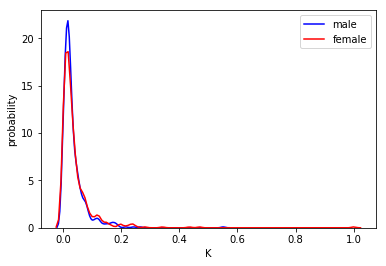

2283
258


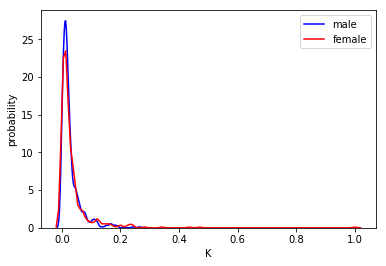

In [54]:
for i in np.arange(1,3,1):
    flushPrint(i)
    book=book.dropna(axis=0,how='any',subset=['m_k_'+str(i),'f_k_'+str(i)])
#     IMDB1['trend_f']=IMDB1['f_k_'+str(i)].apply(lambda x:np.median([i[0] for i in x]))
#     IMDB1['trend_m']=IMDB1['m_k_'+str(i)].apply(lambda x:np.median([i[0] for i in x]))
    book['trend_f']=book['f_k_'+str(i)].apply(lambda x:np.sum([i[0]*i[1] for i in x if i[0]>0])/np.sum([i[1] for i in x if i[0]>0]))
    book['trend_m']=book['m_k_'+str(i)].apply(lambda x:np.sum([i[0]*i[1] for i in x if i[0]>0])/np.sum([i[1] for i in x if i[0]>0]))
    book['distance']=book['trend_f']-book['trend_m']
    book['tp_l']=book['tp'].apply(lambda x: len(x))
    print(len(book[book['distance']>0]))
    print(len(book[book['distance']<0]))
    sns.distplot(list([i for i in book['trend_m'].values]), hist=False, kde=True,color='blue',label='male')
    sns.distplot(list([i for i in book['trend_f'].values]), hist=False, kde=True,color='red',label='female')
    # plt.plot([1,1],[0,1],'--')
    # plt.xlim(-1,2)
    plt.legend()
    plt.ylabel('probability')
    plt.xlabel('K')
    plt.show()

In [55]:
book['trend_f'].describe()

count    6.120000e+02
mean     3.468171e-02
std      6.400002e-02
min      4.848743e-33
25%      7.347591e-03
50%      1.661477e-02
75%      3.715730e-02
max      1.000000e+00
Name: trend_f, dtype: float64

In [56]:
book['trend_m'].describe()

count    6.280000e+02
mean     2.800067e-02
std      3.372294e-02
min      5.289652e-18
25%      8.587080e-03
50%      1.712804e-02
75%      3.210385e-02
max      2.651172e-01
Name: trend_m, dtype: float64

In [59]:
import math

In [60]:
v,p=stats.ttest_ind([i for i in book['trend_m'].values if math.isnan(i)==False], [i for i in book['trend_f'].values if math.isnan(i)==False])
p

0.02117055426490919

In [61]:
book.to_csv('./book.csv',index=False)

In [62]:
len(book)

927

In [63]:
len(book)

927

In [64]:
book=book.dropna(axis=0,how='any',subset=['trend_m','trend_f'])

In [65]:
len(book)

541